___

___
# Linear Regression Project
 You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!



## Imports
 pandas, numpy, matplotlib,and seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

**Checking the head of customers, and check out its info() and describe() methods.**

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**


___
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

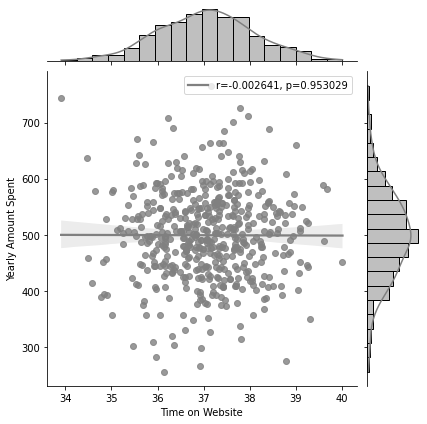

In [6]:
import scipy.stats as stats
graph = sns.jointplot(data=df,x=df['Time on Website'], y=df['Yearly Amount Spent'],kind="reg",color=('grey'))
r, p = stats.pearsonr(df['Time on Website'], df['Yearly Amount Spent'])
graph.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
# Here Zero Correlation exist between Time on Website and Yearly Amount Spent columns
#Since r=-0.0026 = 0 (approx) and reg line is also a straight line

** Doing the same but with the Time on App column instead. **

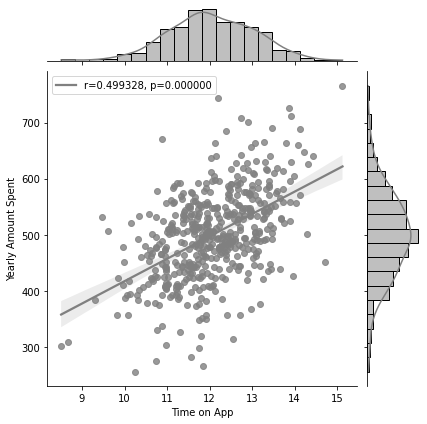

In [7]:
import scipy.stats as stats
graph = sns.jointplot(data=df,x=df['Time on App'], y=df['Yearly Amount Spent'],kind="reg",color=('grey'))
r, p = stats.pearsonr(df['Time on App'], df['Yearly Amount Spent'])
graph.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
# Here weak positive Correlation exist between Time on App and Yearly Amount Spent columns
#Since r=0.499 (5 approx) and reg line is also a increasing straight line

** Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

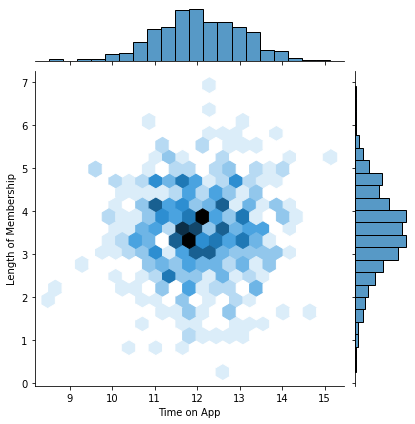

In [8]:
sns.jointplot( x='Time on App', y='Length of Membership', kind='hex', data=df)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

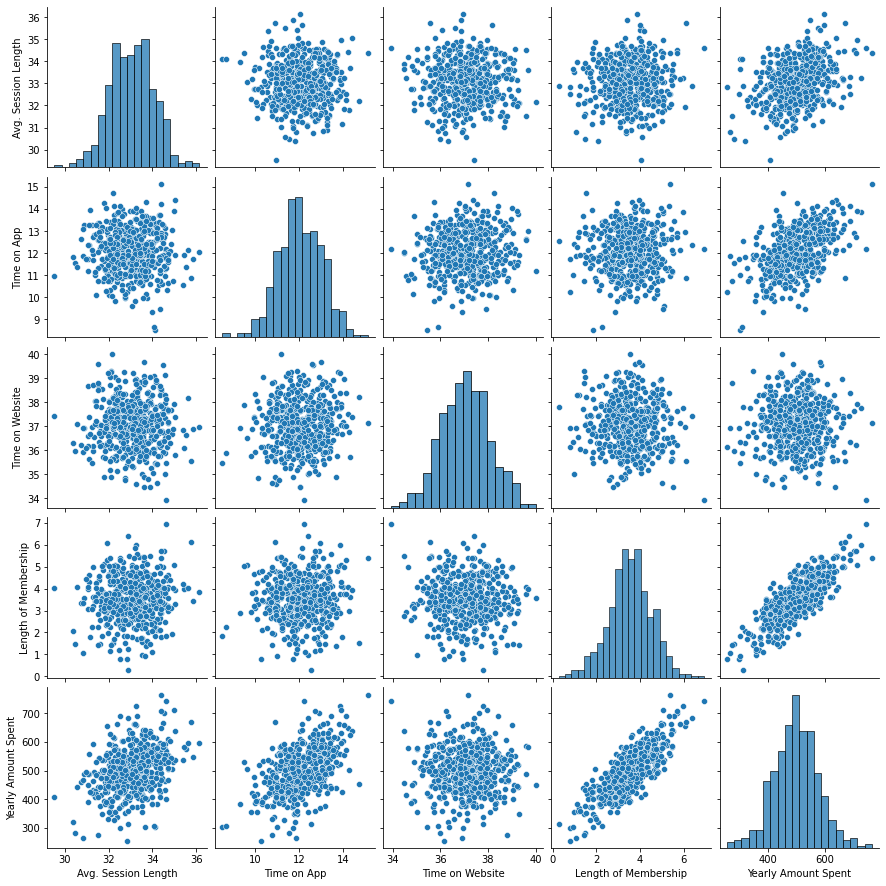

In [9]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

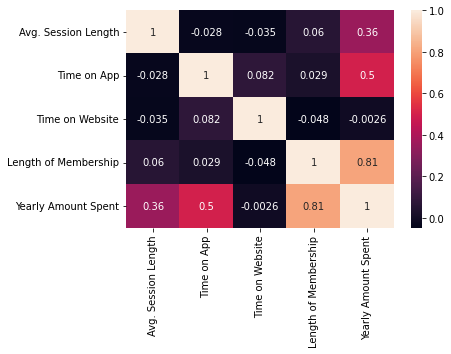

In [10]:
# Length of Membership has highest Correlation with Yearly Amount Spent
sns.heatmap(df.corr(), annot = True)
# print(df['Yearly Amount Spent'].corr(df['Length of Membership']))

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

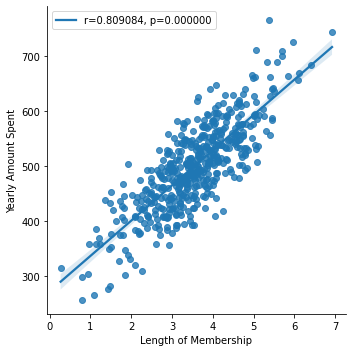

In [11]:
graph=sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = df)
r, p = stats.pearsonr(df['Length of Membership'], df['Yearly Amount Spent'])
graph.ax.legend(['r={:f}, p={:f}'.format(r,p)])

## Training and Testing Data
.
** Seting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [12]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [13]:
y = df['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Importing LinearRegression from sklearn.linear_model **

In [16]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [17]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [18]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prining out the coefficients of the model**

In [19]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
coef_df

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [20]:
predictions = lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

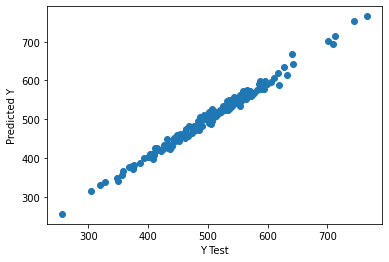

In [21]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [22]:
from sklearn import metrics

In [24]:
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')#MAE
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')#MSE
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')#RMSE

MAE: 7.228148653430845
MSE: 79.81305165097463
RMSE: 8.933815066978644


## Residuals

 

**Ploting a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


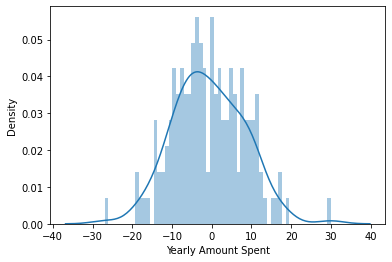

In [25]:
sns.distplot((y_test-predictions),bins = 60)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [26]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
coef_df

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Avg. Session Length** increases the **Yearly Amount Spent** by 26 units while other Cols are constant

**Time on App** increases the **Yearly Amount Spent** by 39 units while other Cols are constant

**Time on Website** increases the **Yearly Amount Spent** by 0.2 units while other Cols are constant

**Length of Membership** increases the **Yearly Amount Spent** by 61 units while other Cols are constant

**Do you think the company should focus more on their mobile app or on their website?**

 Here **Time on App** is showing  a stronger correlation with **Yearly Amount Spent** which is about **0.5**. So the company should focus more on their mobile app.